<a href="https://colab.research.google.com/github/CALORIO-Jeff-Klien/Simulation-PIT/blob/main/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# airfoil_self_noise.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-3689664401.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ASNData = pd.read_csv('/content/drive/MyDrive/DATA/airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)


    Frequency  AngleAttack  ChordLength  FSVelox      SSDT      SSP
0         800          0.0       0.3048     71.3  0.002663  126.201
1        1000          0.0       0.3048     71.3  0.002663  125.201
2        1250          0.0       0.3048     71.3  0.002663  125.951
3        1600          0.0       0.3048     71.3  0.002663  127.591
4        2000          0.0       0.3048     71.3  0.002663  127.461
5        2500          0.0       0.3048     71.3  0.002663  125.571
6        3150          0.0       0.3048     71.3  0.002663  125.201
7        4000          0.0       0.3048     71.3  0.002663  123.061
8        5000          0.0       0.3048     71.3  0.002663  121.301
9        6300          0.0       0.3048     71.3  0.002663  119.541
10       8000          0.0       0.3048     71.3  0.002663  117.151
11      10000          0.0       0.3048     71.3  0.002663  115.391
12      12500          0.0       0.3048     71.3  0.002663  112.241
13      16000          0.0       0.3048     71.3

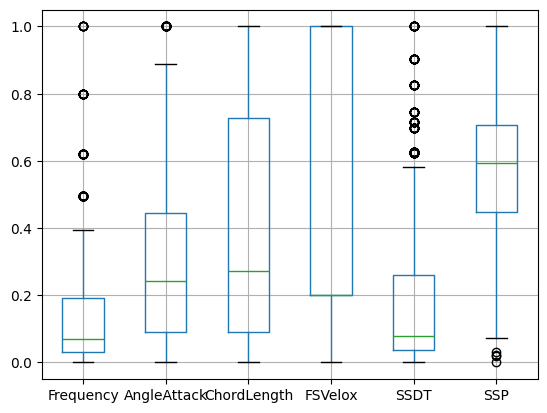

             Frequency  AngleAttack  ChordLength   FSVelox      SSDT       SSP
Frequency     1.000000    -0.272765    -0.003661  0.133664 -0.230107 -0.390711
AngleAttack  -0.272765     1.000000    -0.504868  0.058760  0.753394 -0.156108
ChordLength  -0.003661    -0.504868     1.000000  0.003787 -0.220842 -0.236162
FSVelox       0.133664     0.058760     0.003787  1.000000 -0.003974  0.125103
SSDT         -0.230107     0.753394    -0.220842 -0.003974  1.000000 -0.312670
SSP          -0.390711    -0.156108    -0.236162  0.125103 -0.312670  1.000000


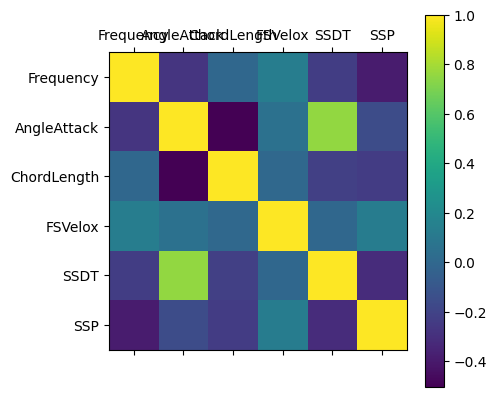

X shape =  (1503, 5)
Y shape =  (1503,)
X train shape =  (1052, 5)
X test shape =  (451, 5)
Y train shape =  (1052,)
Y test shape =  (451,)
Linear Regression Model
0.015826467113949756
SKLearn Neural Network Model
0.003134408008763156


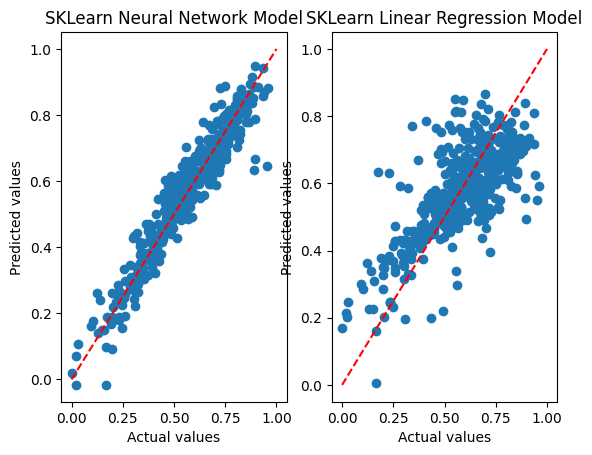

In [ ]:
import pandas as pd

ASNNames= ['Frequency','AngleAttack','ChordLength','FSVelox','SSDT','SSP']

ASNData = pd.read_csv('/content/drive/MyDrive/DATA/airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)

print(ASNData.head(20))

print(ASNData.info())

BasicStats = ASNData.describe()
BasicStats = BasicStats.transpose()
print(BasicStats)


from sklearn.preprocessing import MinMaxScaler

ScalerObject = MinMaxScaler()
print(ScalerObject.fit(ASNData))
ASNDataScaled = ScalerObject.fit_transform(ASNData)
ASNDataScaled = pd.DataFrame(ASNDataScaled, columns=ASNNames)

summary = ASNDataScaled.describe()
summary = summary.transpose()
print(summary)

import matplotlib.pyplot as plt
boxplot = ASNDataScaled.boxplot(column=ASNNames)
plt.show()

CorASNData = ASNDataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorASNData.shape[1]):
    print(CorASNData)

plt.matshow(CorASNData)
plt.xticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.yticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.colorbar()
plt.show()


from sklearn.model_selection import train_test_split

X = ASNDataScaled.drop('SSP', axis = 1)
print('X shape = ',X.shape)
Y = ASNDataScaled['SSP']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)


#Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

from sklearn.metrics import mean_squared_error

MseLM = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model')
print(MseLM)


#MLP Regressor Model
from sklearn.neural_network import MLPRegressor

MLPRegModel = MLPRegressor(hidden_layer_sizes=(50),activation='relu', solver='lbfgs',
                                 tol=1e-4, max_iter=10000, random_state=1)

MLPRegModel.fit(X_train, Y_train)

Y_predMLPReg = MLPRegModel.predict(X_test)

MseMLP = mean_squared_error(Y_test, Y_predMLPReg)
print('SKLearn Neural Network Model')
print(MseMLP)

# Plot a comparison diagram
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predMLPReg)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.plot((0, 1), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()
